In [36]:
# 필요 패키지 다운로드
import pandas as pd
import numpy as np
import urllib.request

import matplotlib.pyplot as plt

In [37]:
!pip install konlpy

# 데이터 다운로드

In [38]:
# 데이터 다운로드
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", filename="ratings_train.txt")
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt", filename="ratings_test.txt")

('ratings_test.txt', <http.client.HTTPMessage at 0x7ab8eff4f8e0>)

# 데이터 프레임 생성

In [39]:
df_train = pd.read_table("ratings_train.txt")
df_test  = pd.read_table("ratings_test.txt")

In [40]:
df_train.head()

id                                           document  label
0   9976970                                아 더빙.. 진짜 짜증나네요 목소리      0
1   3819312                  흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나      1
2  10265843                                  너무재밓었다그래서보는것을추천한다      0
3   9045019                      교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정      0
4   6483659  사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...      1

- `id` : 리뷰 id(index)
- `document` : 리뷰 텍스트
- `label` : `0` -> 부정 리뷰, `1` -> 긍정 리뷰

In [41]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        150000 non-null  int64 
 1   document  149995 non-null  object
 2   label     150000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB


# 중복 데이터 제거

In [42]:
# 1. 중복 데이터 확인하기
df_train['document'].nunique(), df_train['label'].nunique()

(146182, 2)

- 약 4000개 정도의 리뷰가 중복된 리뷰라는 것을 알 수 있음.
- `label`은 두 종류

In [43]:
#  2. 중복 데이터 제거
df_train = df_train.drop_duplicates(subset=['document'])
df_train.nunique()

id          146183
document    146182
label            2
dtype: int64

# 레이블의 비율 확인

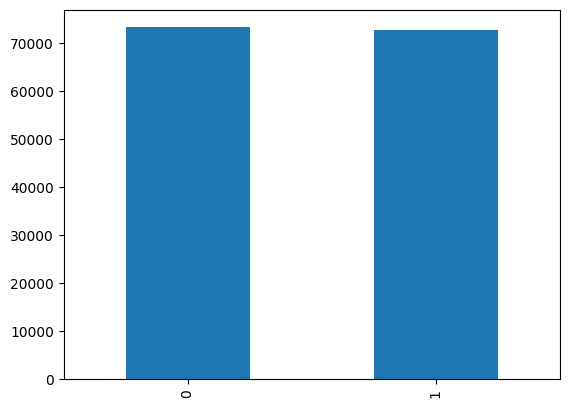

In [44]:
df_train['label'].value_counts().plot(kind='bar')
plt.show()

# 결측치 제거하기

In [45]:
df_train = df_train.dropna(how='any')
df_train.isnull().values.sum()

0

# 정규식을 활용해서 텍스트 정제
- 특수문자, 영문자를 모두 제거하고 한글 데이터만 남길 예정

In [46]:
df_train['document'] = df_train['document'].str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣 ]", "").str.strip()
# ^: 아닌 것! ^~~~: ~~~ 아닌 것들을 치환해라
df_train.head()

<ipython-input-46-25f8e155ecdc>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_train['document'] = df_train['document'].str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣 ]", "").str.strip()


id                                           document  label
0   9976970                                  아 더빙 진짜 짜증나네요 목소리      0
1   3819312                         흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나      1
2  10265843                                  너무재밓었다그래서보는것을추천한다      0
3   9045019                          교도소 이야기구먼 솔직히 재미는 없다평점 조정      0
4   6483659  사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...      1

In [47]:
# 내용이 아무 것도 없는 문자열의 개수 세어보기
# 영어 또는 특수 기호로만 이루어진 리뷰는 내용이 없는 채로 존재
df_train.loc[df_train['document']=="", 'document'].value_counts()

    789
Name: document, dtype: int64

In [48]:
df_train = df_train.loc[df_train['document']!=""]
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145393 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        145393 non-null  int64 
 1   document  145393 non-null  object
 2   label     145393 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.4+ MB


In [49]:
# 테스트 데이터도 훈련 데이터와 동일하게 처리
df_test.drop_duplicates(subset=['document'], inplace=True)
df_test['document'] = df_test['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "").str.strip()
df_test = df_test.loc[df_test['document'] != ""]
df_test = df_test.dropna(how='any')
df_test.info()

<ipython-input-49-0509e7651d4a>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_test['document'] = df_test['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "").str.strip()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 48852 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        48852 non-null  int64 
 1   document  48852 non-null  object
 2   label     48852 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.5+ MB


# 형태소 분리 및 정규화
- Stem, Norm 적용
- 코퍼스 생성

In [50]:
from tqdm import tqdm_notebook
from konlpy.tag import Okt

okt = Okt()

X_train = [] # 훈련할 코퍼스

for sentence in tqdm_notebook(df_train['document']):
  temp_X = okt.morphs(sentence, stem=True, norm=True) # 각 문장에 대해 형태소 분리가 일어난다.
  X_train.append(temp_X) # 형태소 분리가 일어난 문장을 말뭉치에 추가

<ipython-input-50-201a211459be>:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for sentence in tqdm_notebook(df_train['document']):


  0%|          | 0/145393 [00:00<?, ?it/s]

In [51]:
X_train[:3]

[['아', '더빙', '진짜', '짜증나다', '목소리'],
 ['흠', '포스터', '보고', '초딩', '영화', '줄', '오버', '연기', '조차', '가볍다', '않다'],
 ['너', '무재', '밓었', '다그', '래서', '보다', '추천', '한', '다']]

# 단어 집합 생성
- 케라스의 Tokenizer 클래스를 활용해서 만들 수 있다.

In [52]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [53]:
# 정수 인코딩 된 단어 집합 확인
print(tokenizer.word_index)

{'이': 1, '영화': 2, '보다': 3, '하다': 4, '의': 5, '에': 6, '가': 7, '을': 8, '도': 9, '은': 10, '들': 11, '는': 12, '를': 13, '없다': 14, '이다': 15, '있다': 16, '좋다': 17, '너무': 18, '재밌다': 19, '다': 20, '정말': 21, '한': 22, '것': 23, '되다': 24, '적': 25, '만': 26, '같다': 27, '진짜': 28, '으로': 29, '아니다': 30, '않다': 31, '로': 32, '점': 33, '에서': 34, '만들다': 35, '과': 36, '나오다': 37, '연기': 38, '평점': 39, '내': 40, '최고': 41, '그': 42, '나': 43, '안': 44, '인': 45, '왜': 46, '스토리': 47, '생각': 48, '못': 49, '드라마': 50, '감동': 51, '사람': 52, '게': 53, '보고': 54, 'ㅋㅋㅋ': 55, '말': 56, '이렇다': 57, '아깝다': 58, '고': 59, '더': 60, '배우': 61, '때': 62, 'ㅋㅋ': 63, '와': 64, '아': 65, '감독': 66, '거': 67, '그냥': 68, '재미있다': 69, '뭐': 70, '시간': 71, '재미': 72, '내용': 73, '요': 74, '까지': 75, '주다': 76, '중': 77, '좀': 78, '자다': 79, '하고': 80, '지루하다': 81, '재미없다': 82, '쓰레기': 83, '수': 84, '네': 85, '가다': 86, '모르다': 87, '들다': 88, '그렇다': 89, '싶다': 90, '작품': 91, '알다': 92, '사랑': 93, '하나': 94, '다시': 95, '마지막': 96, '볼': 97, '잘': 98, '지': 99, '정도': 100, '저': 101, '처음': 102, '이렇게': 10

# 단어의 빈도수 확인
- 빈도수가 적은 단어는 사용하지 않음
- 오타, 신조어 등 일반적으로 사용하지 않는 단어는 제거하는 것이 낫다.

In [54]:
# threshold 만큼 등장하지 않은 단어들의 비율 확인
def print_freq(threshold):

  total_cnt = len(tokenizer.word_index) # 단어 개수
  rare_cnt  = 0 # 등장 빈도가 threshold보다 작은 단어의 개수를 카운트

  total_freq = 0 # 훈련 데이터 전체 단어 빈도수 총 합. 영화: 3번, 재미: 5번 -> total_freq = 8
  rare_freq  = 0 # 사용된 희귀 단어의 총 합

  for key, value in tokenizer.word_counts.items():
    # key : 단어, value : 빈도수
    total_freq = total_freq + value # 모든 단어의 빈도수 총 합 구하기

    # 희귀단어 개수 및 등장 빈도 계산하기
    if value < threshold :
      rare_cnt += 1
      rare_freq += value

  print("단어 집합의 크기 : {}".format(total_cnt))
  print("등장 빈도가 {} 미만인 희귀 단어의 수 : {}".format(threshold, rare_cnt))
  print("단어 집합에서 희귀 단어의 비율 : {:.3f}%".format((rare_cnt / total_cnt) * 100))
  print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율 : {:.3f}%".format((rare_freq / total_freq) * 100))
  print("="*50)

  return total_cnt, rare_cnt

In [55]:
print_freq(2)
print_freq(3)
print_freq(4)
print_freq(5)

단어 집합의 크기 : 42962
등장 빈도가 2 미만인 희귀 단어의 수 : 18193
단어 집합에서 희귀 단어의 비율 : 42.347%
전체 등장 빈도에서 희귀 단어 등장 빈도 비율 : 0.953%
단어 집합의 크기 : 42962
등장 빈도가 3 미만인 희귀 단어의 수 : 23704
단어 집합에서 희귀 단어의 비율 : 55.174%
전체 등장 빈도에서 희귀 단어 등장 빈도 비율 : 1.531%
단어 집합의 크기 : 42962
등장 빈도가 4 미만인 희귀 단어의 수 : 26830
단어 집합에서 희귀 단어의 비율 : 62.451%
전체 등장 빈도에서 희귀 단어 등장 빈도 비율 : 2.022%
단어 집합의 크기 : 42962
등장 빈도가 5 미만인 희귀 단어의 수 : 28823
단어 집합에서 희귀 단어의 비율 : 67.090%
전체 등장 빈도에서 희귀 단어 등장 빈도 비율 : 2.440%


(42962, 28823)

# 토크나이저 새롭게 만들기

In [56]:
# vocab_size : |V| 사용할 단어의 갯수.
# 전체 단어의 개수 - 희귀 단어의 개수

total_cnt, rare_cnt = print_freq(3)

vocab_size = total_cnt - rare_cnt + 2 # <oov>, <pad> 고려해서 +2
vocab_size

단어 집합의 크기 : 42962
등장 빈도가 3 미만인 희귀 단어의 수 : 23704
단어 집합에서 희귀 단어의 비율 : 55.174%
전체 등장 빈도에서 희귀 단어 등장 빈도 비율 : 1.531%


19260

In [57]:
# 희귀 단어를 사용하지 않고 토크나이저 재구성
tokenizer = Tokenizer(vocab_size, oov_token="<oov>")
tokenizer.fit_on_texts(X_train)

# 정수 인코딩

In [58]:
X_train_encoded = tokenizer.texts_to_sequences(X_train)
X_train_encoded[:3]

[[66, 469, 29, 255, 676],
 [940, 470, 55, 622, 3, 230, 1464, 39, 971, 693, 32],
 [439, 16134, 1, 2326, 5642, 4, 240, 23, 21]]

### 빈도수 제한을 통해서 토크나이저를 만들면 사용되어지지 않은 단어는 그냥 비어 있게 된다.
- 빈도수 3 미만인 단어들로만 리뷰가 구성되어 있으면 비어 있는 배열

In [59]:
# 길이가 1미만인 배열의 인덱스 - 텍스트가 없다!
drop_train = [ index for index, sentence in enumerate(X_train_encoded) if len(sentence) < 1 ]
X_train_encoded = np.delete(X_train_encoded, drop_train, axis=0)
X_train_encoded[:3]

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:5071: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


array([list([66, 469, 29, 255, 676]),
       list([940, 470, 55, 622, 3, 230, 1464, 39, 971, 693, 32]),
       list([439, 16134, 1, 2326, 5642, 4, 240, 23, 21])], dtype=object)

In [60]:
# feature가 제거 되었기 때문에 label도 제거
y_train = np.array(df_train['label'])
y_train = np.delete(y_train, drop_train, axis=0)
y_train

array([0, 1, 0, ..., 0, 1, 0])

# 패딩 설정하기
- 모든 문장의 길이를 맞춰야지만 행렬 병렬 연산(WX + b)

In [61]:
print("리뷰의 최대 길이 : {}".format(max(len(l) for l in X_train_encoded)))
print("리뷰의 평균 길이 : {}".format(sum(map(len, X_train_encoded)) / len(X_train_encoded)))

리뷰의 최대 길이 : 78
리뷰의 평균 길이 : 13.12573507665431


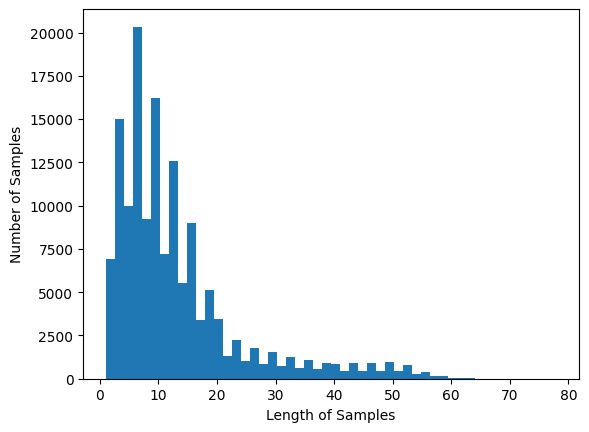

In [62]:
# 시각화
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel("Length of Samples")
plt.ylabel("Number of Samples")
plt.show()

In [63]:
# 최대 길이를 30으로 설정하고 패딩 적용
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_train_padded = pad_sequences(X_train_encoded, maxlen=30)
X_train_padded[:2]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,   66,  469,   29,  255,  676],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,  940,  470,   55,
         622,    3,  230, 1464,   39,  971,  693,   32]], dtype=int32)

# 기본 RNN 모델 생성하기

In [64]:
from tensorflow.keras.layers import Embedding, Dense, SimpleRNN
from tensorflow.keras.models import Sequential

In [65]:
model = Sequential([
    Embedding(vocab_size, 128),
    SimpleRNN(128), # Cell 내의 뉴런이 128개
    Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 128)         2465280   
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 128)               32896     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 2498305 (9.53 MB)
Trainable params: 2498305 (9.53 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [66]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['acc']
)

In [67]:
model.fit(
    X_train_padded,
    y_train,
    batch_size=64,
    validation_split=0.2,
    epochs=10
)

Epoch 1/10
1818/1818 [==============================] - 95s 52ms/step - loss: 0.4109 - acc: 0.8107 - val_loss: 0.3697 - val_acc: 0.8394
Epoch 2/10
1818/1818 [==============================] - 63s 35ms/step - loss: 0.3216 - acc: 0.8645 - val_loss: 0.3774 - val_acc: 0.8353
Epoch 3/10
1818/1818 [==============================] - 66s 36ms/step - loss: 0.2525 - acc: 0.8983 - val_loss: 0.4184 - val_acc: 0.8280
Epoch 4/10
1818/1818 [==============================] - 61s 33ms/step - loss: 0.1920 - acc: 0.9249 - val_loss: 0.4777 - val_acc: 0.8121
Epoch 5/10
1818/1818 [==============================] - 61s 33ms/step - loss: 0.1574 - acc: 0.9403 - val_loss: 0.5040 - val_acc: 0.8212
Epoch 6/10
1818/1818 [==============================] - 63s 34ms/step - loss: 0.1399 - acc: 0.9472 - val_loss: 0.5687 - val_acc: 0.8102
Epoch 7/10
1818/1818 [==============================] - 62s 34ms/step - loss: 0.1272 - acc: 0.9522 - val_loss: 0.5930 - val_acc: 0.8137
Epoch 8/10
1818/1818 [==========================

In [69]:
# 일반 자연어(새로운 문장)가 들어 왔을 때 모델을 이용한 처리
def sentiment_predict(new_sentence):
  new_sentence = okt.morphs(new_sentence, stem=True) # 토큰화

  # 정수 인코딩
  encoded = tokenizer.texts_to_sequences([new_sentence])

  # 패딩
  pad_new = pad_sequences(encoded, maxlen=30)

  # 예측
  score = float(model.predict(pad_new))

  # 시그모이드를 사용했기 때문에 결과값이 0.5 넘어가면 긍정 리뷰(1)
  if score > 0.5 :
    print("{:.2f}% 확률로 긍정 리뷰 입니다.".format(score * 100))
  else:
    # 0.5 미만이면 부정 리뷰 (0)
    print("{:.2f}% 확률로 부정 리뷰 입니다.".format(( 1 - score ) * 100))

In [70]:
test_review = "영화가 너무 노잼ㅋㅋ"
sentiment_predict(test_review)

1/1 [==============================] - 0s 156ms/step
89.55% 확률로 부정 리뷰 입니다.


In [71]:
test_review = "너무 잠이 잘 오는 영화 였어요"
sentiment_predict(test_review)

1/1 [==============================] - 0s 19ms/step
91.09% 확률로 부정 리뷰 입니다.


In [72]:
test_review = "초반부가 매우 지루했는데 보다보니 볼만 했다"
sentiment_predict(test_review)

1/1 [==============================] - 0s 31ms/step
99.02% 확률로 긍정 리뷰 입니다.
